<a href="https://colab.research.google.com/github/cfreeman22/Tweeter_US_Airline_Sentiment/blob/master/US_Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment project 
# Christian Freeman - June 25 2022

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

In [1]:
 
# install and import necessary libraries.

!pip install contractions
import warnings
warnings.filterwarnings('ignore')

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup  
!pip install contractions
import nltk
import contractions                         # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd 
import seaborn as sns                                    # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('all')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt           
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 41.7 MB/s 
     |████████████████████████████████| 287 kB 65.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

# Data Summary

In [2]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data =pd.read_csv('drive/My Drive/Tweets.csv')

In [4]:
data.shape

(14640, 15)

In [5]:
data.head()  

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Checcking for duplicates

In [7]:
# Check for duplicate rows
duplicate_data = data[data.duplicated()]
 
print(duplicate_data.shape)  
# There are 36 duplicate rows

(36, 15)


In [8]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True) 

In [9]:
data.shape

(14604, 15)

In [10]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

### Observations
- The data has 14640 rows and 15 columns
- There are 36 duplicates 
- After dropping duplicates, the data come down to 14604 rows and 15 columns
- Airline sentiment gold, negative reason gold, and tweet cooord columns are missing more that 90% of data
- Tweet location, timezone, negativereason confidence and negative reason columns are missing more that 30% of data

# Exploratory data analysis

### A) The distribution of all tweets among each airline & the distribution of sentiment across all the tweets

[]

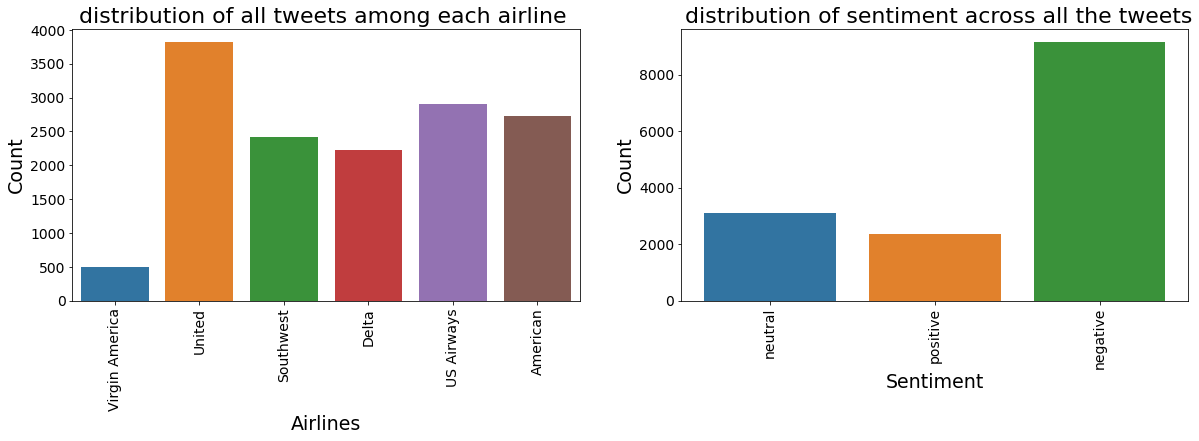

In [11]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.subplot(121)
col = "airline"
xlabel = "Airlines"
ylabel = "Count"

sns.countplot(x=data[col])
plt.title("distribution of all tweets among each airline ")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.subplot(122)
col = "airline_sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(data[col])
plt.title(" distribution of sentiment across all the tweets")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

### Takeaways
- United airlines has more tweets followed by Us Airways and American Airlines
- Virgin America has less tweets
- There are more negatives reviews than neutral and positives reviews commbined


### B) 1 The distribution of Sentiment of tweets for each airline  

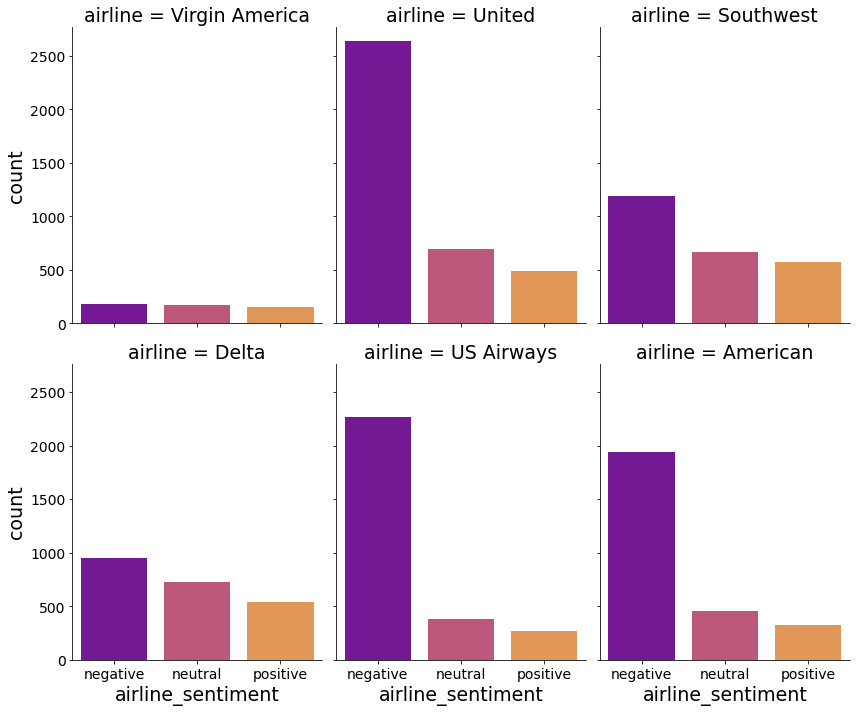

In [12]:
tweet_and_airlines = sns.FacetGrid(data, col="airline", col_wrap=3, height=5, aspect =0.8)
tweet_and_airlines = tweet_and_airlines.map(sns.countplot, "airline_sentiment",order =data.airline_sentiment.value_counts().index, palette='plasma')


### takeaways
- US Airways , United Airlines and American have more negative reviews than their neutral and positivereviews combined
- Delta and Southwest seem to have a slight avriation in their neutral, negative and positive reviews
- 

### B) 2  The distribution of all the negative reasons.

Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


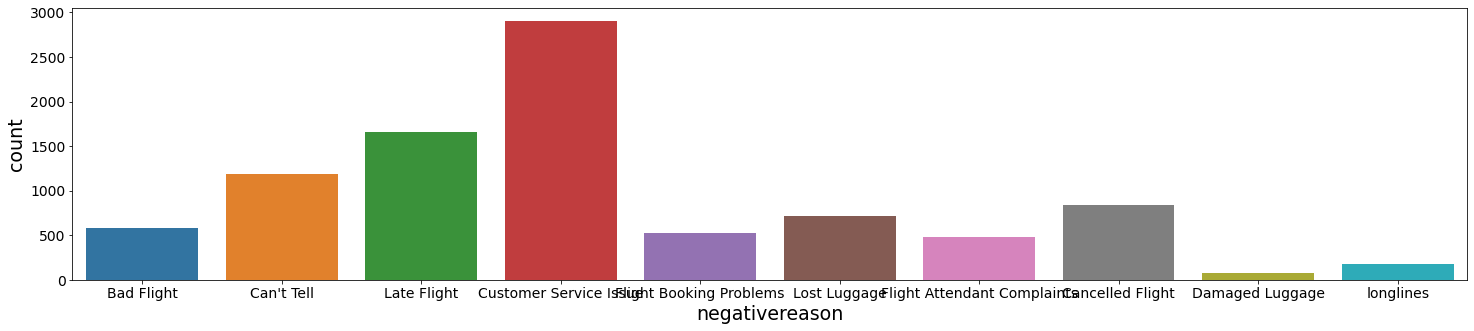

In [13]:
# Check the most common negative reason 
y = data['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,5)) 
g = sns.countplot(y)
# Customer service and Late flight seems to be the main reason why customers are giving bad feedback

- Most complaints are customers service ()number one complaint, late flights , cancel flight or general bad experience for the can't category

[]

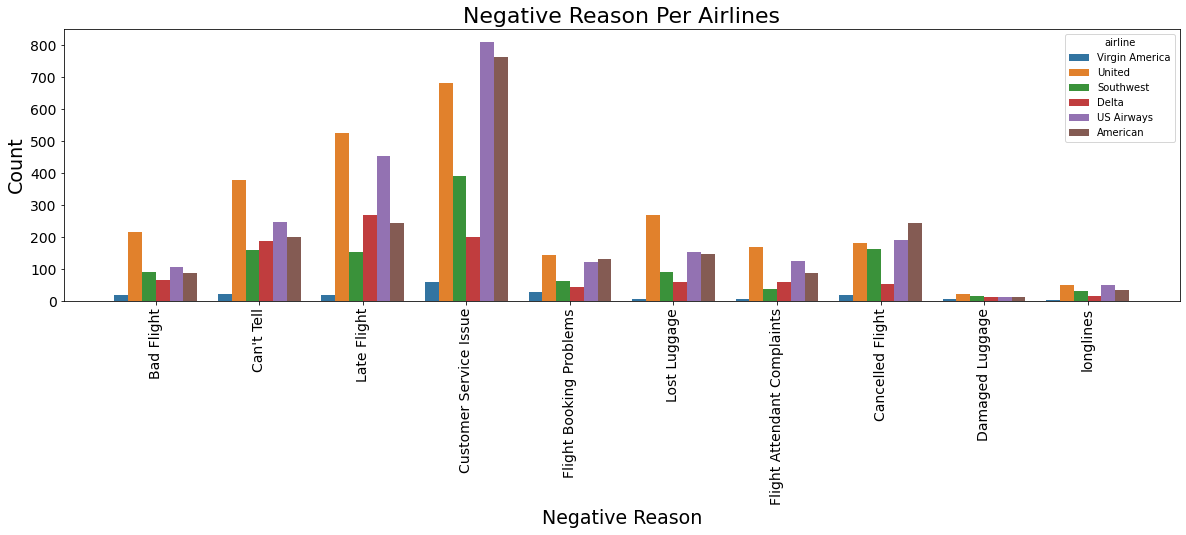

In [14]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Negative Reason"
ylabel = "Count"

title = "Negative Reason Per Airlines"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "negativereason"
col2 = "airline"
sns.countplot(x=data[col1], hue=data[col2])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

#### C. Plot the word cloud graph of tweets for negative sentiment.

In [15]:
data2 = data.copy()

In [16]:
data2['text'] = data2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data2['text'].astype(str).tolist())                 # Converting text column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()


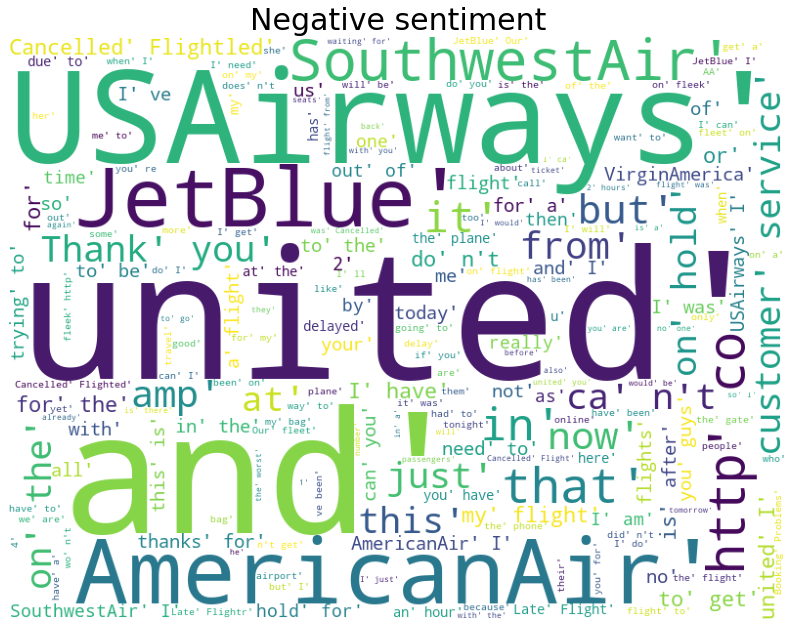

In [17]:
show_wordcloud(data2[data2.airline_sentiment == "negative"], title = "Negative sentiment")

### C. Plot the word cloud graph of tweets for  neutral sentiment.

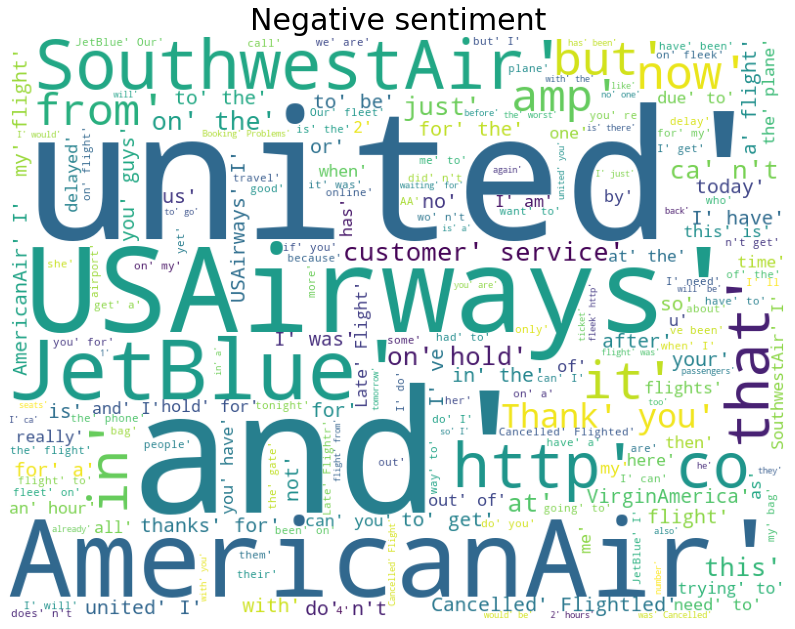

In [18]:
show_wordcloud(data2[data2.airline_sentiment == "neutral"], title = "Negative sentiment")

### Plot for positive Sentiment

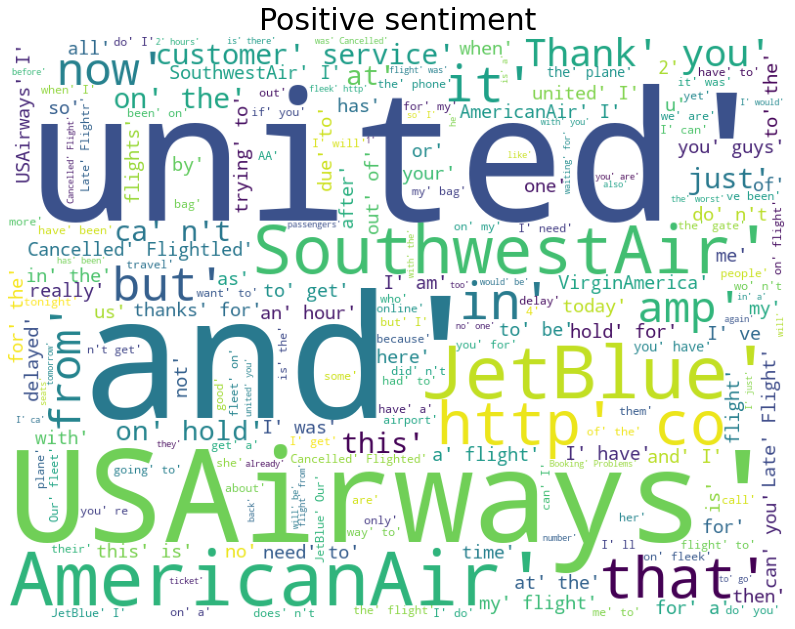

In [19]:
show_wordcloud(data2[data2.airline_sentiment == "positive"], title = "Positive sentiment")

# Understanding of Data Columns
### a. Drop all other columns except “text” and “airline_sentiment”.

 

In [20]:
# Let us now remove irrelevant columns
tweet_data = data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

### b. Check the shape of data.

In [21]:
tweet_data.shape

(14604, 2)

### c. Print first 5 rows of data

In [22]:
tweet_data.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Data Pre - Processing
- a. Html tag removal.
- b. Tokenization.
- c. Remove the numbers.
- d. Removal of Special Characters and Punctuations.
- e. Conversion to lowercase.
- f. Lemmatize or stemming.
- g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
- h. Print first 5 rows of data after pre-processing.

In [23]:
#remove the html tags
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, 'html')                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
 

In [24]:
tweet_data['text'] = tweet_data['text'].apply(lambda x: clean_text(x)) #[nltk.word_tokenize(line) for line in x ]
tweet_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [25]:
tweet_data['text'] = tweet_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
tweet_data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


In [26]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
tweet_data['text'] = tweet_data.apply(lambda row: normalize(row['text']), axis=1)

In [27]:
tweet_data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


#  Vectorization

In [28]:
count_vec = CountVectorizer(analyzer="word", max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = count_vec.fit_transform(tweet_data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [29]:
print (data_features.shape)
print(data_features)

(14604, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
# Take a look at the words in the vocabulary
count_vec_vocab = count_vec.get_feature_names()
print (count_vec_vocab)

['aa', 'aacom', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', 'afternoon', 'age', 'agency', 'agent', 'agents', 'aggravate', 'aggressive'

### Stopords

In [31]:
count_vec_stop_words = count_vec.get_stop_words()
print (count_vec_stop_words)


None


### Sum up the counts of each vocabulary **word**

In [32]:
# Sum up the counts of each vocabulary word
dist = np.sum(data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(count_vec_vocab, dist):
    print (count, tag)

279 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
120 able
4 aboard
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
91 account
6 accountability
2 accrue
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
127 add
4 addition
17 additional
53 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
2 afterall
30 afternoon
15 age
6 agency
260 agent
155 agents
3 aggravate
3 aggressive
2 agnt
132 ago
9 agree
3 agt
12 ah
17 ahead
4 ahhh

## TF-IDF Vectorizer

In [33]:
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(tweet_data['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [34]:
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(14604, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
# Checking for stop words
tfidf_vectorizer_stop_words = tfidf_vectorizer.get_stop_words()
print (tfidf_vectorizer_stop_words)

None


# Modelling , tuning and Evaluation

### Dividing Data to Train and Test

In [36]:
x = data_features     # Predictor feature columns
y = tweet_data['airline_sentiment']   # Predicted class

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10222, 5000)
(10222,)
(4382, 5000)
(4382,)


## Random forest Model With Countvectorizer

## Bag of Words (CountVectorizer)
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [39]:
 # Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [40]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, x_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

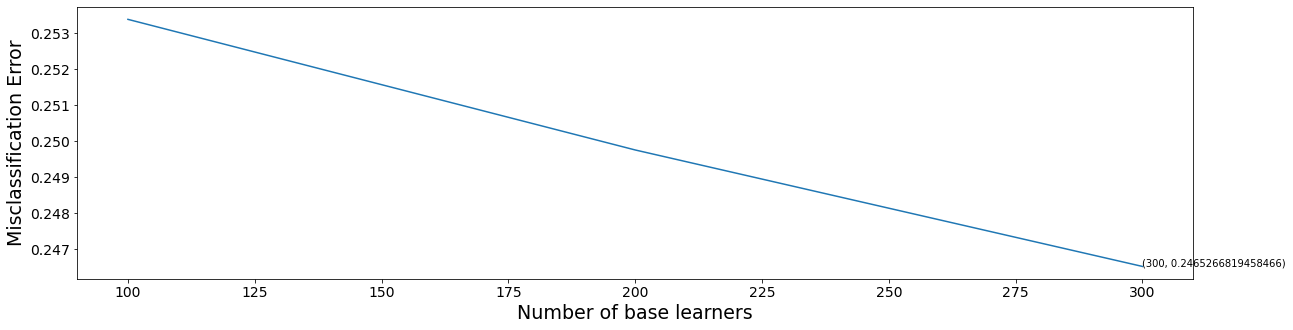

In [41]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [42]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
count_vectorizer_predicted = clf.predict(x_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative','neutral' ,'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))
 

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      2796
     neutral       0.58      0.47      0.52       885
    positive       0.73      0.60      0.66       701

    accuracy                           0.77      4382
   macro avg       0.71      0.66      0.68      4382
weighted avg       0.76      0.77      0.76      4382

Accuracy of the model is :  0.7674577818347786


[[2527  198   71]
 [ 386  414   85]
 [ 173  106  422]]


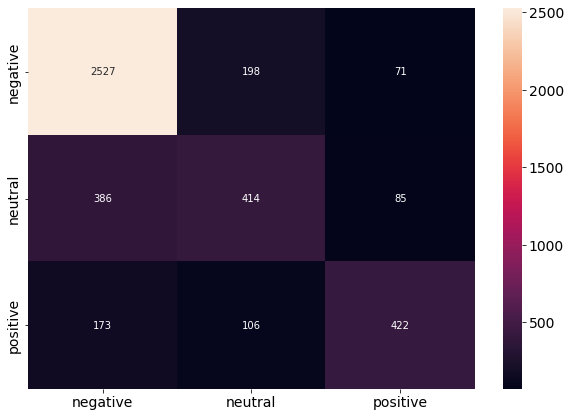

In [43]:
conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','neutral' ,'positive']],
                  columns = [i for i in ['negative','neutral' , 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,jetblue,great,flight,delay,usairways,http,southwestair,unite,hold,hours,love,americanair,get,cancel,virginamerica,bag,call,awesome,wait,amaze,hour,time,dm,follow,customer,service,please,help,best,fly,go,would,still,tell,good,appreciate,make,plane,say,
 
 


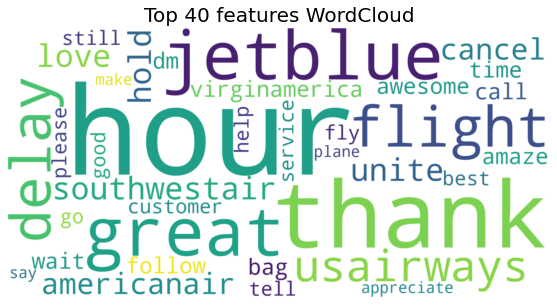

In [44]:
all_features = count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Random Forest with TF-IDF

In [45]:
X= tfidf_vectorizer_data_features
y = tweet_data['airline_sentiment'] 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [48]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

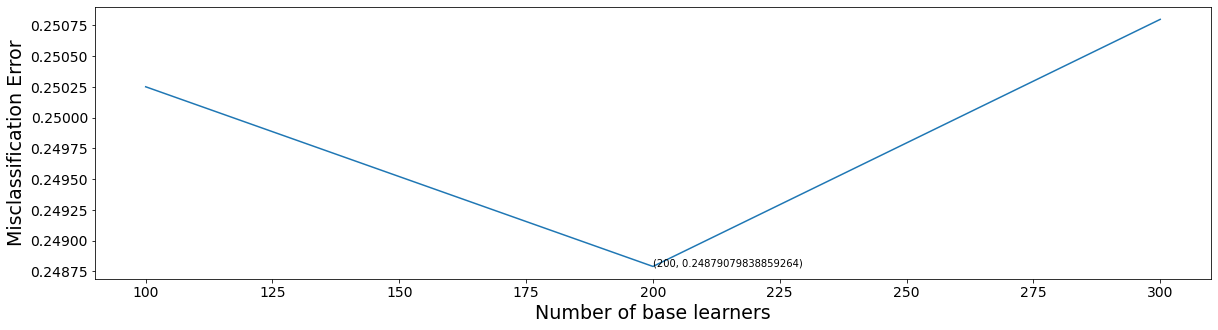

In [49]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [50]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['negative','neutral' ,'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      2330
     neutral       0.64      0.39      0.48       741
    positive       0.76      0.56      0.65       580

    accuracy                           0.77      3651
   macro avg       0.73      0.63      0.66      3651
weighted avg       0.76      0.77      0.75      3651

Accuracy of the model is :  0.7688304574089291


[[2193   96   41]
 [ 392  287   62]
 [ 185   68  327]]


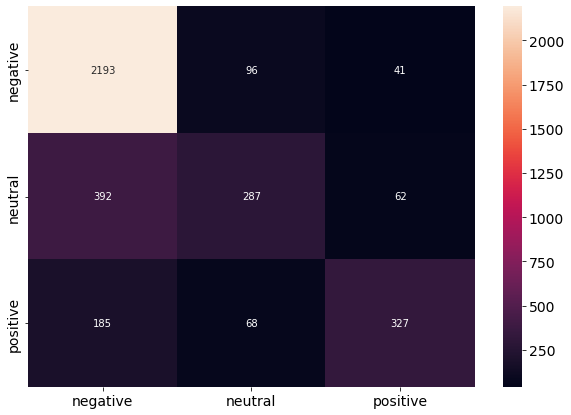

In [51]:
conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','neutral' ,'positive']],
                  columns = [i for i in ['negative','neutral' ,'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,jetblue,southwestair,usairways,unite,americanair,http,great,delay,flight,virginamerica,love,hold,hours,unite thank,jetblue thank,get,bag,awesome,dm,southwestair thank,amaze,americanair thank,cancel,call,appreciate,hour,best,good,follow,time,wait,fly,please,service,help,make,usairways thank,customer,hi,
 
 


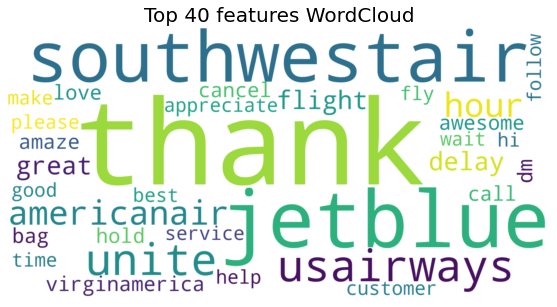

In [52]:
all_features = tfidf_vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# Conclusion
TF-IDF shows a slighly better performance than Count Vectorizer 76.88% VS 76.74% , because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.